In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/CS_464_Project/Data.zip > /dev/null

jazz.00054 is a corrupt file in the original data, replaced with jazz.00099

In [ ]:
# Importing libraries

import os
import numpy as np
import pandas as pd
import librosa        # librosa is a python package for music and audio analysis
import librosa.display
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score

plt.rcParams['figure.figsize'] = (15, 5)

# Preprocessing 1 (1000 samples)

In [ ]:
audio_directory = '/content/Data/genres_original/'

In [ ]:
# Getting all the file names by putting in the path to the audio data
# and returning all the audio file names as a list
# filename example "jazz.00099.wav"
def get_filenames(audio_dir):
    filenamesList = []
    # os.walk() has generates 3 outputs
      # Dirpath: String leading the files or folder to directory path. Used throwaway variable _ to ignore this.
      # Dirnames: List of subdirectory names at first nesting level in directory. If none then list is empty.
      # Filenames: List of file names in the directory.
    for _, dirnames, filenames in os.walk(audio_dir, topdown=False):
        if dirnames == []:
            # Generating list of filenames
            for file in filenames:
                filenamesList.append(file)
    # Retrieving list from the function
    return filenamesList

# Getting path of file from the filename by putting in the path to audio data and list of filenames.
# and returing the path
def get_path(audio_dir, filename):
    # Readding leading zeros for the files by using the anonymous lambda function.
    get_class = lambda filename : filename.split('.')[0]
    folder = get_class(filename)
    # File stored folders with leading three digits of filename.
    return os.path.join(audio_dir, folder, filename)

In [ ]:
filenames = get_filenames(audio_directory)
filenames.sort()

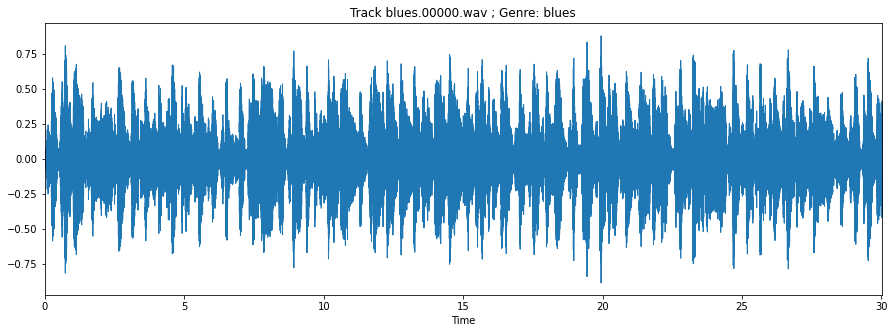

In [ ]:
filename = filenames[0]
filepath = get_path(audio_directory, filename)
genre = filename.split('.')[0]
y, sr = librosa.load(filepath)
plt.figure()
librosa.display.waveplot(y, sr=sr)
plt.title('Track {} ; Genre: {}'.format(filename, genre))
plt.show()

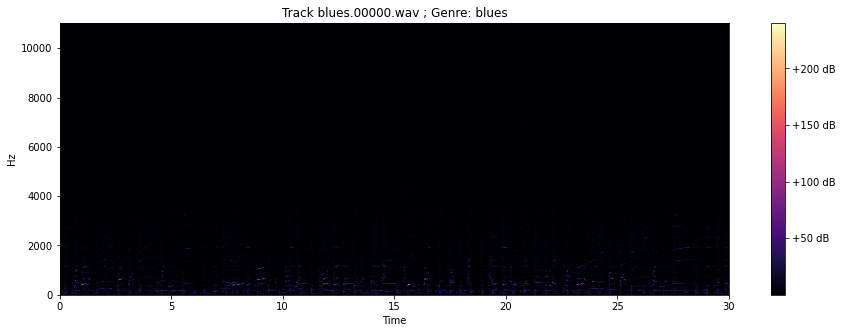

In [ ]:
D = np.abs(librosa.stft(y))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear')
plt.title('Track {} ; Genre: {}'.format(filename, genre))
plt.colorbar(format='%+2.0f dB')
plt.show()

Feature Extraction:

Mel-Spectrogram:
From the audio files the Mel-Spectrogram is being extracted.

In [ ]:
# Making the log mel-spectrogram by the use of audio time series and plotting it.
# It takes the audio filenames, decision to plot or not (default False), audio label as inputs.
# It returns the mel-spectrogram.

# Mel spectrogram is a spectrogram that is converted to a Mel scale.
# A spectrogram is a visualization of the frequency spectrum of a signal, where the frequency
# spectrum of a signal is the frequency range that is contained by the signal.
# The Mel scale mimics how the human ear works, with research showing humans don’t perceive frequencies
# on a linear scale. Humans are better at detecting differences at lower frequencies than at higher frequencies.
# A mel spectrogram logarithmically renders frequencies above a certain threshold (the corner frequency).

# The Mel spectrogram is used to provide our models with sound information similar to what a human would perceive.
# The raw audio waveforms are passed through filter banks to obtain the Mel spectrogram.

def log_melspectrogram(filename, *, plot=False, genre_label=''):
    filepath = get_path(audio_directory, filename)
    y, _ = librosa.load(filepath)

    # Finding the mel-spectrogram: y: audio time-series; sr = sampling rate; n_fft: length of FFT window;
                                 # hop_length: # of samples b/w successive frames; n_mels: # of mel bands to generate
                                 # sr of 32,000 Hz has slight affect on audio quality.
                                 # Traditionally pick powers of 2 for n_fft (FFT window size), so 2^11 = 2048, and hop_len < n_fft
                                 # Traditionally use 128 mel bands
    melspec = librosa.feature.melspectrogram(y = y, sr = 32000, n_fft = 2048, hop_length = 1024, n_mels = 128)
    # Convert spectorgram to decibels
    melspec = librosa.power_to_db(melspec, ref = np.max)

    # Plotting the figure if plot is True
    if plot:
        if genre_label != '':
            plt.title('Track {} --- Genre: {}'.format(filename, genre_label))
        else:
            plt.title('Track {}'.format(filename))

        librosa.display.specshow(melspec, x_axis='time', y_axis='mel', sr= 32000, fmax=8000)
        plt.colorbar(format='%+2.0f dB')
        plt.show()

    return melspec

In [ ]:
# Create mel-spectrograms for all audio in the data, using filenames as the input
# and returning an array with log mel-spectrogrms for audio and the class/genre.
def batch_log_melspectrograms(filenames):
    # Initializing variables
    melspecs = np.empty((0, 128, 640))
    genres = []

    for i, filename in enumerate(filenames):
        # Making log mel-spectrogram
        melspec = log_melspectrogram(filename)

        # The mel-spectrograms each have slightly diffent dimensions, so the ending is trimmed out
        # The data lost in this way is minimal
        melspec = melspec[:,:640]

        melspecs = np.concatenate((melspecs, [melspec]), axis=0)

        # Saving the class/genre
        get_class = lambda filename : filename.split('.')[0]
        genre = get_class(filename)
        genres.append(genre)

        # Printing progress 100 tracks (each class) at a time
        if (i+1) % 100 == 0:
            print('Finished {} tracks'.format(i+1))
    # Converting to array for easy usage
    melspecs = np.array(melspecs)
    labels = np.array(genres)

    return melspecs, labels

Displaying the log Mel-spectrograms for the 31st entry in each class

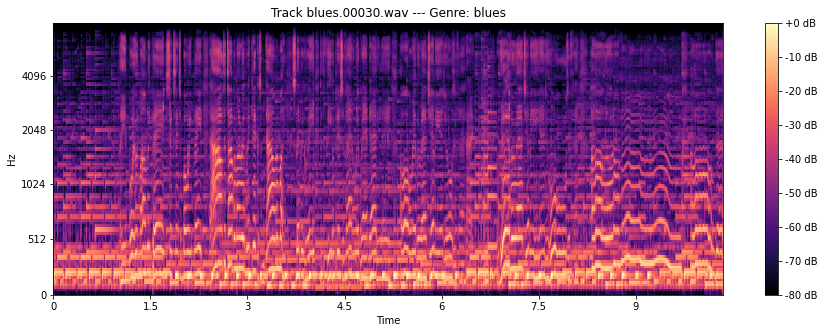

In [ ]:
filename = filenames[30]
genre = filename.split('.')[0]
log_melspectrogram(filename, plot=True, genre_label=genre);

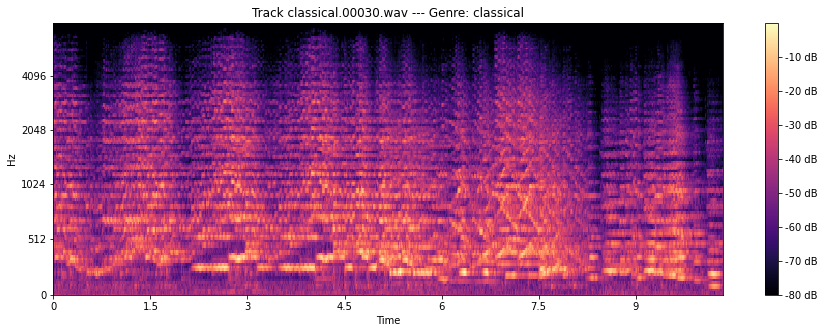

In [ ]:
filename = filenames[130]
genre = filename.split('.')[0]
log_melspectrogram(filename, plot=True, genre_label=genre);

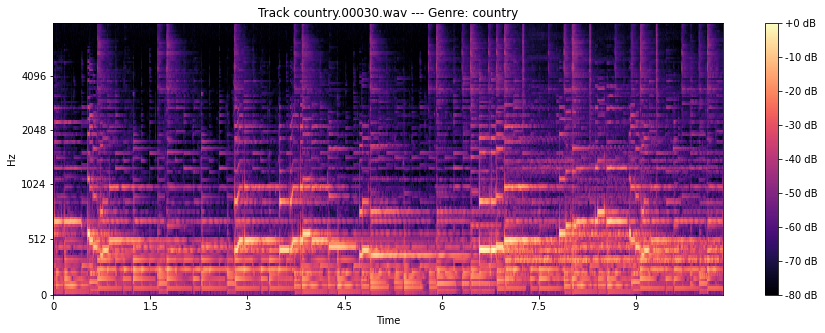

In [ ]:
filename = filenames[230]
genre = filename.split('.')[0]
log_melspectrogram(filename, plot=True, genre_label=genre);

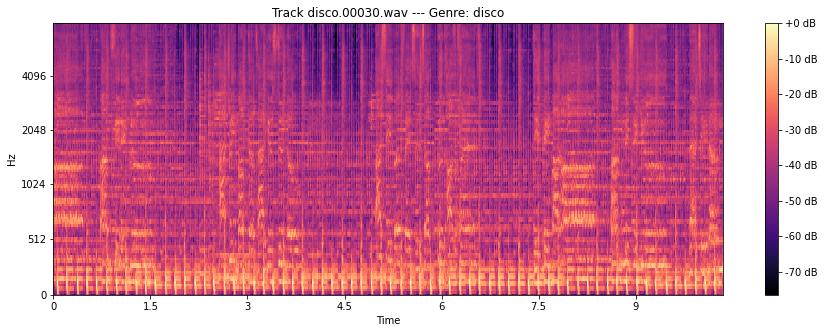

In [ ]:
filename = filenames[330]
genre = filename.split('.')[0]
log_melspectrogram(filename, plot=True, genre_label=genre);

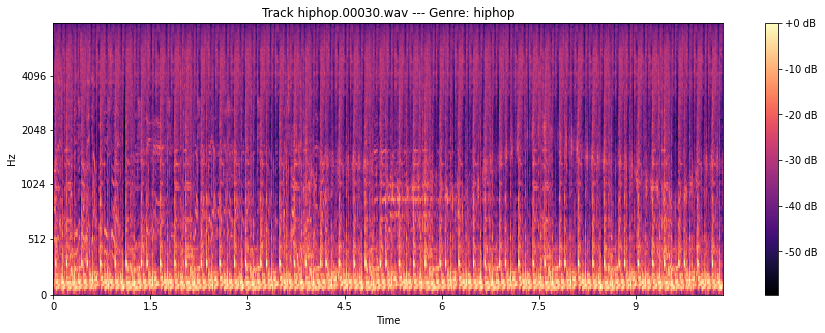

In [ ]:
filename = filenames[430]
genre = filename.split('.')[0]
log_melspectrogram(filename, plot=True, genre_label=genre);

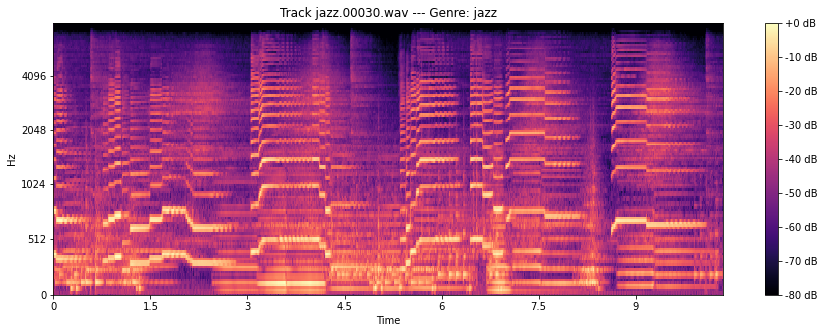

In [ ]:
filename = filenames[530]
genre = filename.split('.')[0]
log_melspectrogram(filename, plot=True, genre_label=genre);

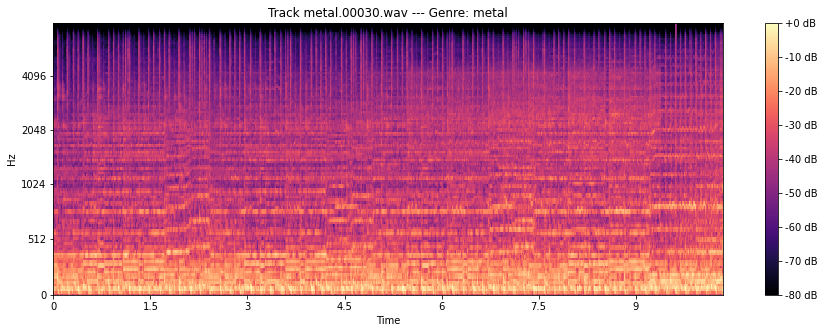

In [ ]:
filename = filenames[630]
genre = filename.split('.')[0]
log_melspectrogram(filename, plot=True, genre_label=genre);

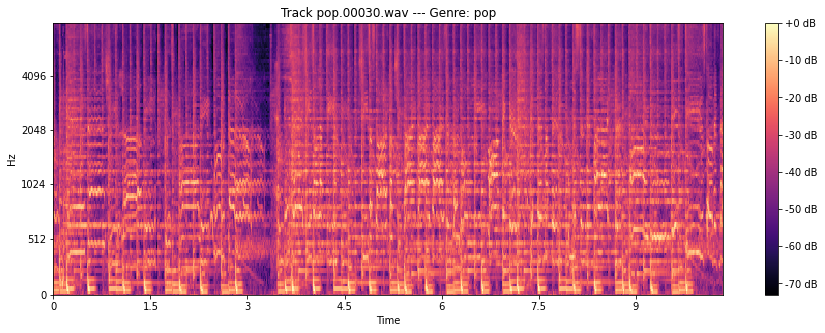

In [ ]:
filename = filenames[730]
genre = filename.split('.')[0]
log_melspectrogram(filename, plot=True, genre_label=genre);

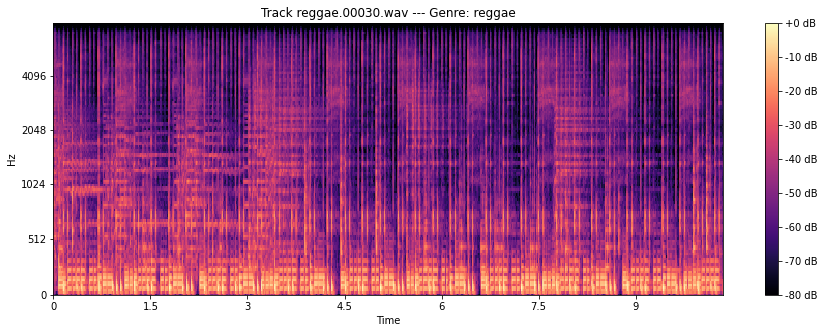

In [ ]:
filename = filenames[830]
genre = filename.split('.')[0]
log_melspectrogram(filename, plot=True, genre_label=genre);

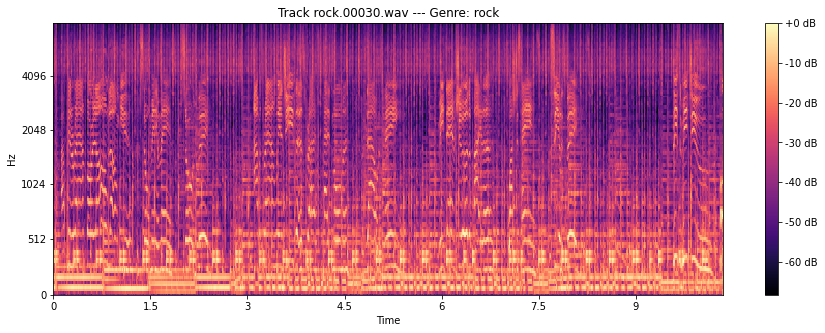

In [ ]:
filename = filenames[930]
genre = filename.split('.')[0]
log_melspectrogram(filename, plot=True, genre_label=genre);

Getting arrays for log mel-spectrograms for all data, with labels

In [ ]:
melspecs, labels = batch_log_melspectrograms(filenames)

Finished 100 tracks
Finished 200 tracks
Finished 300 tracks
Finished 400 tracks
Finished 500 tracks
Finished 600 tracks
Finished 700 tracks
Finished 800 tracks
Finished 900 tracks
Finished 1000 tracks


In [ ]:
# Making splits for running ML methods
X_train, X_test, y_train, y_test = train_test_split(melspecs, labels, shuffle=True, test_size=0.3)

In [ ]:
X_train.shape

(800, 128, 640)

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
for (u, c) in zip(unique, counts):
    print('{} : {}'.format(u, c))

blues : 73
classical : 73
country : 84
disco : 73
hiphop : 80
jazz : 90
metal : 81
pop : 80
reggae : 81
rock : 85


Encoding the labels to a numeric form [0, 1, 2, ... , 9]

In [ ]:
encodedLabels = preprocessing.LabelEncoder()
encodedLabels.fit(y_train)
encodedLabels.classes_

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype='<U9')

In [ ]:
label_train = encodedLabels.transform(y_train)
label_test = encodedLabels.transform(y_test)

In [ ]:
le_name_mapping = dict(zip(encodedLabels.classes_, encodedLabels.transform(encodedLabels.classes_)))
le_name_mapping

{'blues': 0,
 'classical': 1,
 'country': 2,
 'disco': 3,
 'hiphop': 4,
 'jazz': 5,
 'metal': 6,
 'pop': 7,
 'reggae': 8,
 'rock': 9}

In [ ]:
y_train = label_train
y_test = label_test

In [ ]:
# Backups
trainX = X_train
testX = X_test
trainY = y_train
testY = y_test

# Resetting Variables

In [ ]:
X_train = trainX
X_test = testX
y_train = trainY
y_test = testY

# PCA

Running PCA to reduce feature dimensionality

In [ ]:
X_train = trainX
X_test = testX
y_train = trainY
y_test = testY

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Using vectors instead of matrices
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [ ]:
X_train.shape   # 81920 features

(800, 81920)

In [ ]:
# Running PCA to check for 2 PCs
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [ ]:
# Joining test and train splits temporarily
X = np.concatenate((X_train_reduced, X_test_reduced), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

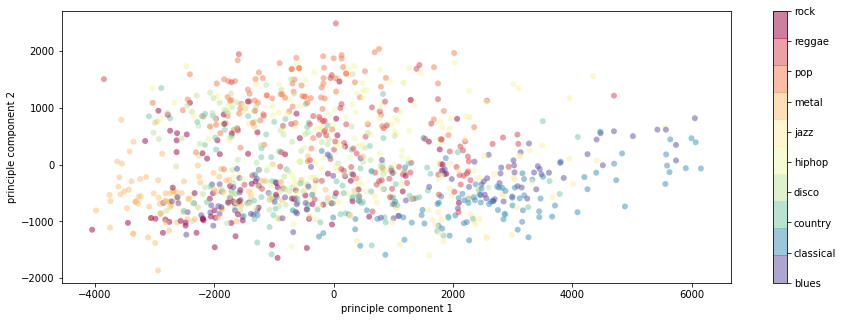

In [ ]:
# Plotting the PCs to show class seperability

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

plt.scatter(X[:, 0], X[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral_r', 10))
plt.xlabel('principle component 1')
plt.ylabel('principle component 2')
cbar = plt.colorbar()
cbar.set_ticks(range(10))
cbar.set_ticklabels(genres)

The data appears to be seperable when looking at the first and second principle components. This would allow for the kNN implementation to run smoothly.

In [ ]:
pca = PCA().fit(X_train)

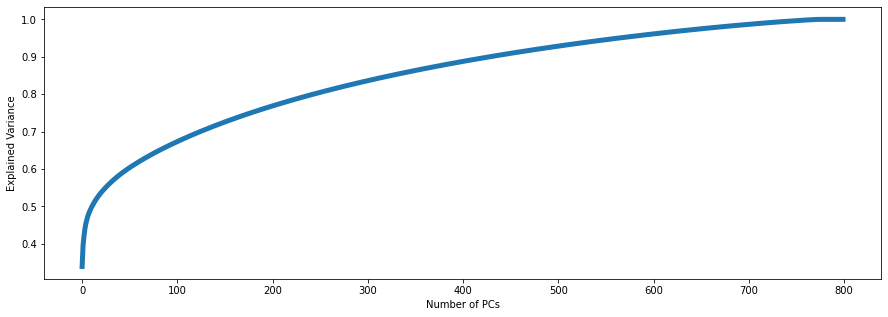

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), lw=5)
plt.xlabel('Number of PCs')
plt.ylabel('Explained Variance')
plt.show()

The plot shows the explained varience for the features contained in N PCs. Aroubt 75% variance is explained by the first 190 PCs, and around 500 PCs are needed to improve it to 100% of variance explained. After this point, increasing the number of PCs gives diminishing returns in variance explained. Hence a PCA being applied to the data would help make the classification more efficient.

# kNN

In [ ]:
X_train = trainX
X_test = testX
y_train = trainY
y_test = testY

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
plt.rcParams['figure.figsize'] = (10, 10)

In [ ]:
# Using vectors instead of matrices
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [ ]:
# Standardize features by removing the mean and scaling to unit variance (Normalizing)
scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
X_train_sc.shape

(800, 81920)

In [ ]:
# PCA to reduce dimensionality
pca = PCA(n_components = 18)
pca.fit(X_train_sc)

X_train_reduced = pca.transform(X_train_sc)
X_test_reduced = pca.transform(X_test_sc)

In [ ]:
X_train_reduced.shape

(800, 18)

In [ ]:
# kNN parameters are weights (distance used) and neighbours
# distance: use distance to vote
# Checking from k = 5 to k = 10 neighbours to determine the best value of k
parameters = {'n_neighbors': range(5, 11)}
knn = KNeighborsClassifier()
# GridSearchCV used for hyperparameter tuning, it also performs K-Fold Cross Validation, with 5 folds by default
clf = GridSearchCV(knn, parameters)

In [ ]:
clf.fit(X_train_reduced, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(5, 11)})

In [ ]:
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test_reduced)
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'n_neighbors': 6}

Grid scores on development set:

0.456 (+/-0.048) for {'n_neighbors': 5}
0.461 (+/-0.060) for {'n_neighbors': 6}
0.458 (+/-0.066) for {'n_neighbors': 7}
0.459 (+/-0.077) for {'n_neighbors': 8}
0.460 (+/-0.065) for {'n_neighbors': 9}
0.455 (+/-0.060) for {'n_neighbors': 10}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.38      0.37      0.38        27
           1       1.00      0.48      0.65        27
           2       0.17      0.31      0.22        16
           3       0.21      0.11      0.15        27
           4       0.42      0.75      0.54        20
           5       0.15      0.40      0.22        10
           6       0.67      0.74      0.70        19
           7       0.69      0.55      0.61        20
           8       0.46      0.32  

It can be seen that the best parameter k for kNN to be used is k = 9. The overall accuracy of the model is 43%, which is expected for a kNN classifier on larger datasets, as there is high bias and low variance. kNN falls to the curse of dimensionality, even after a PCA.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


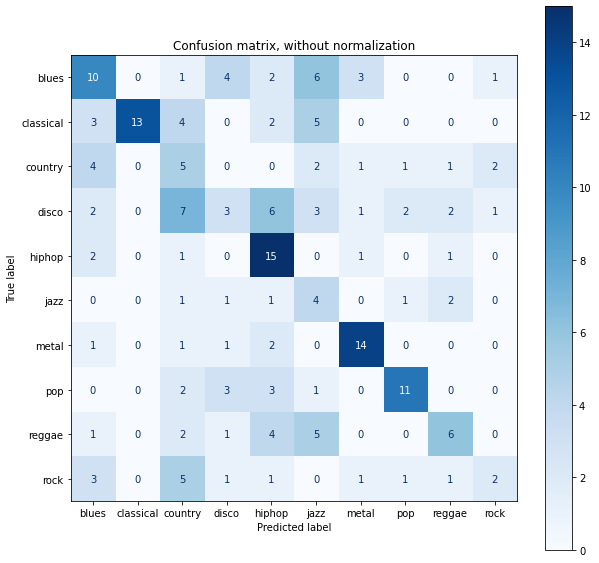

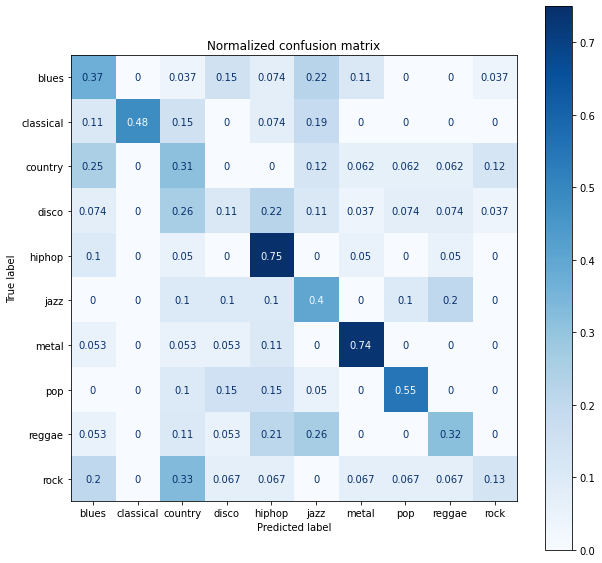

In [ ]:
class_names = ['blues', 'classical', 'country', 'disco',
               'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test_reduced, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

The best classified  genres were metal, jazz, pop, and hiphop, which seems correct because of their uniqueness.

# Preprocessing 2 (for CNN)

In [ ]:
import os
import librosa
import math
import json
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset_path = r"/content/Data/genres_original"
json_path = r"data.json"
SAMPLE_RATE = 22050
DURATION = 30
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

In [ ]:
def save_mfcc(dataset_path, json_path, n_mfcc=13, n_fft=2048,
             hop_length=512, num_segments=5):
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": [],
    }
    samples_ps = int(SAMPLES_PER_TRACK/num_segments)
    expected_vects_ps = math.ceil(samples_ps/hop_length)

    # loop through all the genres
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        if dirpath is not dataset_path:
            dirpath_comp = dirpath.split("/")
            semantic_label = dirpath_comp[-1]
            data["mapping"].append(semantic_label)
            print(f"Processing: {semantic_label}")

            for f in filenames:
                if(f==str("jazz.00054.wav")):
                    continue
                else:
                    file_path = os.path.join(dirpath, f)
                    signal,sr = librosa.load(file_path,sr=SAMPLE_RATE)
                    for s in range(num_segments):
                        start_sample = samples_ps * s
                        finish_sample = start_sample + samples_ps

                        mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
                                                    sr = sr,
                                                    n_fft = n_fft,
                                                    n_mfcc = n_mfcc,
                                                    hop_length = hop_length)

                        mfcc = mfcc.T
                        if len(mfcc)==expected_vects_ps:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i-1)
                            print(f"{file_path}, segment: {s+1}")

    with open(json_path,"w") as f:
        json.dump(data,f,indent=4)

In [ ]:
save_mfcc(dataset_path,json_path,num_segments=10)

In [ ]:
filepath = r"/content/Data/genres_original/blues/blues.0000"

In [ ]:
import json
import numpy as np

In [ ]:
# load data
def load_data(dataset_path):
    with open(dataset_path,"r") as f:
        data = json.load(f)

    # Convert list to numpy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])

    return inputs,targets

In [ ]:
inputs,targets = load_data(r"./data.json")

In [ ]:
# splitting the data
from sklearn.model_selection import train_test_split

input_train, input_test, target_train, target_test = train_test_split(inputs, targets, test_size=0.3)
print(input_train.shape, target_train.shape)

(6990, 130, 13) (6990,)


# CNN

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

In [ ]:
def prepare_dataset(test_size, validation_size):
    X,y = load_data(r"./data.json")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = validation_size)
    X_train = X_train[..., np.newaxis]
    X_val = X_val[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_dataset(0.25, 0.2)

In [ ]:
input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3])
print(input_shape)

(130, 13, 1)


In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation = "relu", input_shape = input_shape))
model.add(MaxPool2D((3, 3), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPool2D((3, 3), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(32, (2, 2), activation = "relu"))
model.add(MaxPool2D((2, 2), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(16, (1, 1), activation = "relu"))
model.add(MaxPool2D((1, 1), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 6, 64)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 6, 64)        256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 32)         18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 2, 32)        0         
 2D)                                                             
                                                        

In [ ]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

hist = model.fit(X_train, y_train,
                 validation_data = (X_val, y_val),
                 epochs = 50,
                 batch_size = 128)

Epoch 1/50
47/47 [==============================] - 10s 31ms/step - loss: 1.9910 - accuracy: 0.2976 - val_loss: 5.0149 - val_accuracy: 0.1949
Epoch 2/50
47/47 [==============================] - 0s 10ms/step - loss: 1.4559 - accuracy: 0.4720 - val_loss: 3.1641 - val_accuracy: 0.2163
Epoch 3/50
47/47 [==============================] - 0s 10ms/step - loss: 1.2640 - accuracy: 0.5420 - val_loss: 1.6145 - val_accuracy: 0.4239
Epoch 4/50
47/47 [==============================] - 0s 10ms/step - loss: 1.1187 - accuracy: 0.5971 - val_loss: 1.7148 - val_accuracy: 0.4386
Epoch 5/50
47/47 [==============================] - 0s 11ms/step - loss: 1.0275 - accuracy: 0.6261 - val_loss: 1.1772 - val_accuracy: 0.5888
Epoch 6/50
47/47 [==============================] - 0s 10ms/step - loss: 0.9429 - accuracy: 0.6690 - val_loss: 1.0133 - val_accuracy: 0.6355
Epoch 7/50
47/47 [==============================] - 0s 11ms/step - loss: 0.8805 - accuracy: 0.6972 - val_loss: 1.0159 - val_accuracy: 0.6282
Epoch 8/50
4

Text(0.5, 1.0, 'Model-Loss w.r.t Epochs')

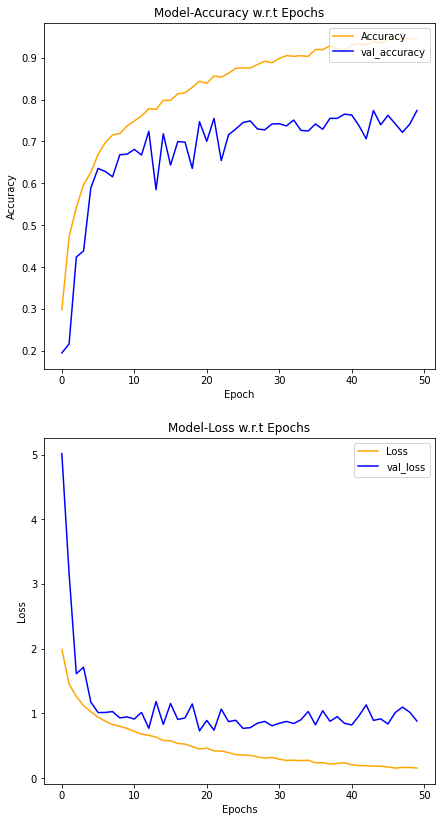

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(7,14))
ax2.plot(hist.history['loss'], color='orange', label='Loss')
ax2.plot(hist.history['val_loss'], color='blue', label='val_loss')
ax2.legend(loc='upper right')
ax1.plot(hist.history['accuracy'], label='Accuracy', color='orange')
ax1.plot(hist.history['val_accuracy'], label='val_accuracy', color='blue')
ax1.legend(loc="upper right")
ax1.set_title("Model-Accuracy w.r.t Epochs", loc='center')
plt.xlabel("Epochs")
plt.ylabel("Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax2.set_ylabel("Loss")
ax2.set_title("Model-Loss w.r.t Epochs", loc='center')


In [ ]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")

79/79 [==============================] - 0s 4ms/step - loss: 0.9466 - accuracy: 0.7657
Test accuracy: 0.7657188773155212


In [ ]:
def predict(model, X, y):
    X = X[np.newaxis,...]
    prediction = model.predict(X)
    predicted_index = np.argmax(prediction, axis=1)
    print(f"Expected index: {y}, Predicted index: {predicted_index}")
    return predicted_index

In [ ]:
y_predicted = []
for i in range(len(y_test)):
  y_predicted = np.append(y_predicted,(predict(model, X_test[i], y_test[i])))
y_predicted = np.asarray(y_predicted)

1/1 [==============================] - 1s 735ms/step
Expected index: 8, Predicted index: [8]
1/1 [==============================] - 0s 43ms/step
Expected index: 5, Predicted index: [4]
1/1 [==============================] - 0s 25ms/step
Expected index: 2, Predicted index: [2]
1/1 [==============================] - 0s 23ms/step
Expected index: 5, Predicted index: [4]
1/1 [==============================] - 0s 44ms/step
Expected index: 2, Predicted index: [2]
1/1 [==============================] - 0s 23ms/step
Expected index: 8, Predicted index: [1]
1/1 [==============================] - 0s 22ms/step
Expected index: 0, Predicted index: [0]
1/1 [==============================] - 0s 24ms/step
Expected index: 8, Predicted index: [8]
1/1 [==============================] - 0s 26ms/step
Expected index: 6, Predicted index: [6]
1/1 [==============================] - 0s 26ms/step
Expected index: 1, Predicted index: [7]
1/1 [==============================] - 0s 26ms/step
Expected index: 7, Predicte

In [ ]:
y_predicted.shape

(2497,)

In [ ]:
predict(model, X_test[420], y_test[420])

1/1 [==============================] - 0s 22ms/step
Expected index: 7, Predicted index: [7]


array([7])

<Figure size 432x288 with 0 Axes>

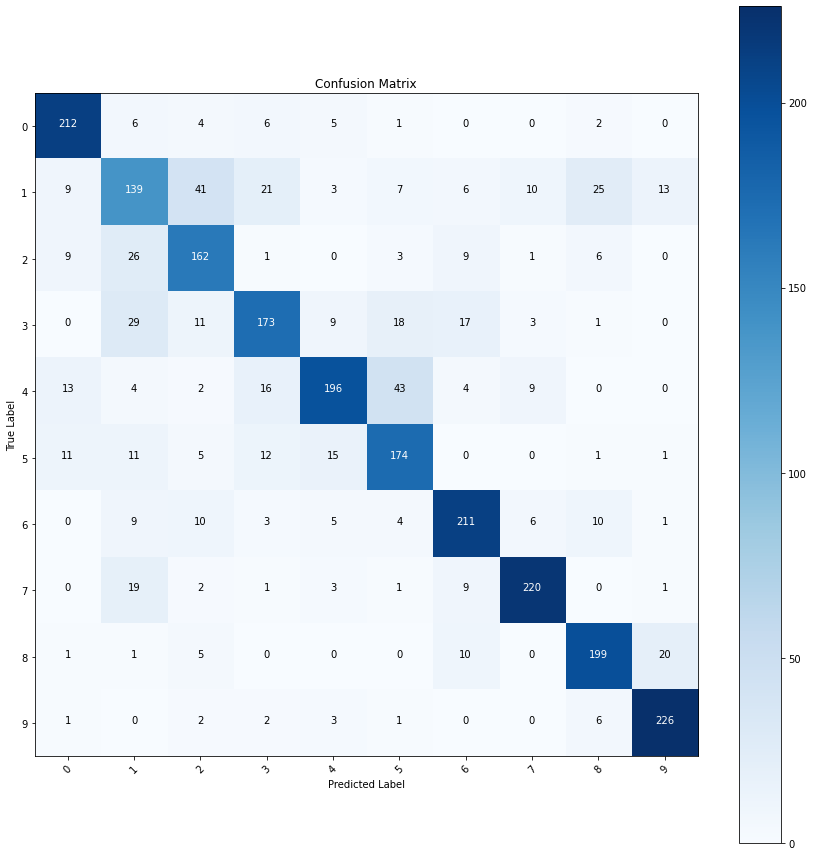

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_predicted, y_test,)
import itertools
plt.clf()
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.imshow(cm, cmap = plt.cm.Blues, interpolation='nearest')

plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(range(10)))
plt.xticks(tick_marks, range(10), rotation=45)
plt.yticks(tick_marks, range(10))
thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i , cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.savefig('con_matrix_LSTM_GTZAN.png')

# Preprocessing 3 (for LSTM)

In [ ]:
import matplotlib.pyplot as plt

import librosa
import librosa.display
from tqdm import tqdm
import IPython.display as ipd
import pandas as pd
import tensorflow as tf
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Dense, Dropout, LSTM, Embedding, Flatten, Bidirectional
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.metrics import AUC
import os
import shutil
label_csv = '/content/Data//features_3_sec.csv'
audio_fpath = "/content/Data//genres_original/"

In [ ]:
class AudioAugmentation:
    def add_noise(self, data):
        noise = np.random.randn(len(data))
        data_noise = data + 0.005 * noise
        return data_noise

    def shift(self, data):
        return np.roll(data, 6614)

    def stretch(self, data, rate=1):
        input_length = 16000
        data = librosa.effects.time_stretch(data, rate)
        if len(data) > input_length:
            data = data[:input_length]
        else:
            data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
        return data

In [ ]:
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in audio folder = ",len(audio_clips))
df = pd.read_csv(label_csv)

print(df.head())
df.shape

No. of .wav files in audio folder =  10
            filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  .

(9990, 60)

In [ ]:
x, sr = librosa.load('/content/Data//genres_original/blues/blues.00000.wav')

print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(661794,) 22050


In [ ]:
audio_duration = x.shape[0] / sr

In [ ]:
extracted_data = []
for index, row in tqdm(df.iterrows()):
    mfcc = []
    class_labels = row['label']
    for i in range(1,21):
        mfcc.append(row['mfcc'+ str(i)+'_mean'])
    extracted_data.append([mfcc, class_labels])
print(extracted_data[0][0])

9990it [00:01, 8763.25it/s]

[-118.62791442871094, 125.08362579345705, -23.443723678588867, 41.32148361206055, -5.976108074188232, 20.115140914916992, -16.04541015625, 17.85519790649414, -14.633434295654297, 10.270526885986328, -9.70827865600586, 10.18387508392334, -4.681614398956299, 8.417439460754395, -7.233476638793945, -2.8536033630371094, -3.2412803173065186, 0.7222089767456055, -5.05033540725708, -0.2430267930030822]


In [ ]:
np.array(extracted_data).shape

<ipython-input-36-52f488590121>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(extracted_data).shape


(9990, 2)

In [ ]:
feature_df = pd.DataFrame(extracted_data, columns=['feature','class'])

feature_df.head()

,feature,class
0,"[-118.62791442871094, 125.08362579345705, -23....",blues
1,"[-125.59070587158205, 122.42122650146484, -20....",blues
2,"[-132.4419403076172, 115.08517456054688, -14.8...",blues
3,"[-118.23108673095705, 132.1165008544922, -18.7...",blues
4,"[-105.96837615966795, 134.64364624023438, -19....",blues


In [ ]:
x = np.array(feature_df['feature'].tolist())

x.shape

(9990, 20)

In [ ]:
target = np.array(feature_df['class'].tolist())

In [ ]:
y_new = pd.get_dummies(target)
print(y_new.shape)
y_new.head()

(9990, 10)


,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y_new,
                                                    test_size=0.2,
                                                    random_state=34)

print(str(X_train.shape)+ ', ' + str(X_test.shape))
inp = (1, 20)
np.array(X_train).reshape(7992, 1, 20)

(7992, 20), (1998, 20)


array([[[-7.19432068e+01,  5.09186668e+01, -3.25752068e+01, ...,
          4.21978712e+00, -4.32345104e+00,  4.26240063e+00]],

       [[-8.96314468e+01,  6.66058578e+01,  3.35223856e-03, ...,
         -5.23508215e+00, -6.54579282e-01, -7.80134916e+00]],

       [[-1.25661259e+01,  8.74030762e+01, -2.56277251e+00, ...,
          1.68945110e+00,  1.48128676e+00,  8.47255886e-01]],

       ...,

       [[-2.49262505e+01,  8.49870224e+01, -9.34418774e+00, ...,
          3.42060995e+00, -7.33167768e-01, -1.71595478e+00]],

       [[-6.18711243e+01,  5.34508247e+01, -2.66516972e+01, ...,
          5.55589056e+00, -6.14011955e+00,  8.70399833e-01]],

       [[-2.37396027e+02,  1.19676277e+02, -1.44767761e+00, ...,
         -2.43864012e+00, -1.43802547e+00,  2.29523683e+00]]])

In [ ]:
np.array(X_train).reshape(7992,1,20)

array([[[-7.19432068e+01,  5.09186668e+01, -3.25752068e+01, ...,
          4.21978712e+00, -4.32345104e+00,  4.26240063e+00]],

       [[-8.96314468e+01,  6.66058578e+01,  3.35223856e-03, ...,
         -5.23508215e+00, -6.54579282e-01, -7.80134916e+00]],

       [[-1.25661259e+01,  8.74030762e+01, -2.56277251e+00, ...,
          1.68945110e+00,  1.48128676e+00,  8.47255886e-01]],

       ...,

       [[-2.49262505e+01,  8.49870224e+01, -9.34418774e+00, ...,
          3.42060995e+00, -7.33167768e-01, -1.71595478e+00]],

       [[-6.18711243e+01,  5.34508247e+01, -2.66516972e+01, ...,
          5.55589056e+00, -6.14011955e+00,  8.70399833e-01]],

       [[-2.37396027e+02,  1.19676277e+02, -1.44767761e+00, ...,
         -2.43864012e+00, -1.43802547e+00,  2.29523683e+00]]])

# LSTM

In [ ]:
model = Sequential()
model.add(Input(shape = (1,20)))
model.add(Bidirectional(LSTM(512, return_sequences = True, recurrent_dropout = 0.1, dropout = 0.1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 1, 1024)          2183168   
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 2,193,418
Trainable params: 2,193,418
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
es = EarlyStopping(
    monitor='val_accuracy', restore_best_weights=True, patience=20, min_delta = 0.001
)

history = model.fit(
    np.array(X_train).reshape(7992, 1, 20),
    np.array(y_train),
    epochs=100,
    callbacks = [es],
    shuffle = True,
    batch_size = 128,
    validation_data = (
        np.array(X_test).reshape(1998,1,20),
        np.array(y_test)
    )
)
model.save('LSTM')

Epoch 1/100
63/63 [==============================] - 6s 24ms/step - loss: 1.5691 - accuracy: 0.4474 - val_loss: 1.2781 - val_accuracy: 0.5375
Epoch 2/100
63/63 [==============================] - 1s 15ms/step - loss: 1.2710 - accuracy: 0.5503 - val_loss: 1.1561 - val_accuracy: 0.5901
Epoch 3/100
63/63 [==============================] - 1s 15ms/step - loss: 1.1700 - accuracy: 0.5852 - val_loss: 1.0720 - val_accuracy: 0.6161
Epoch 4/100
63/63 [==============================] - 1s 16ms/step - loss: 1.1023 - accuracy: 0.6066 - val_loss: 1.0133 - val_accuracy: 0.6476
Epoch 5/100
63/63 [==============================] - 1s 15ms/step - loss: 1.0608 - accuracy: 0.6253 - val_loss: 0.9695 - val_accuracy: 0.6572
Epoch 6/100
63/63 [==============================] - 1s 15ms/step - loss: 1.0076 - accuracy: 0.6470 - val_loss: 0.9215 - val_accuracy: 0.6752
Epoch 7/100
63/63 [==============================] - 1s 15ms/step - loss: 0.9693 - accuracy: 0.6659 - val_loss: 0.8942 - val_accuracy: 0.6947
Epoch 

Text(0.5, 1.0, 'Model-Loss w.r.t Epochs')

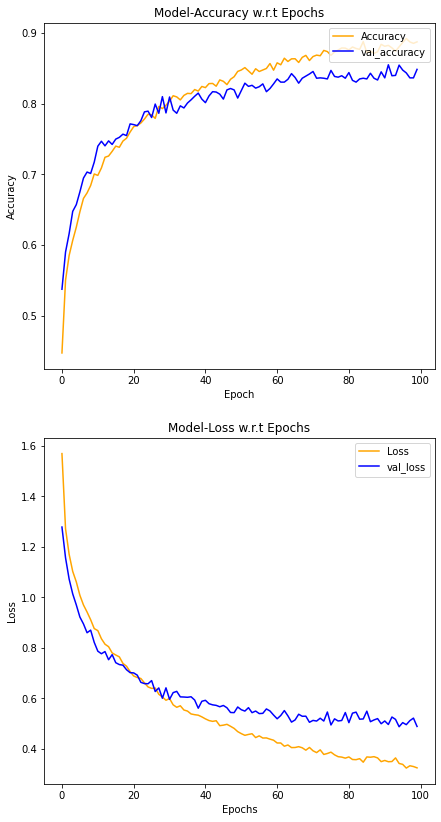

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(7,14))
ax2.plot(history.history['loss'], color='orange', label='Loss')
ax2.plot(history.history['val_loss'], color='blue', label='val_loss')
ax2.legend(loc='upper right')
ax1.plot(history.history['accuracy'], label='Accuracy', color='orange')
ax1.plot(history.history['val_accuracy'], label='val_accuracy', color='blue')
ax1.legend(loc="upper right")
ax1.set_title("Model-Accuracy w.r.t Epochs", loc='center')
plt.xlabel("Epochs")
plt.ylabel("Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax2.set_ylabel("Loss")
ax2.set_title("Model-Loss w.r.t Epochs", loc='center')


In [ ]:
y_pred = model.predict(np.array(x).reshape(9990, 1,20))

y_pred_classes = np.argmax(y_pred, axis=1)

y_pred.shape

313/313 [==============================] - 1s 2ms/step


(9990, 10)

In [ ]:
y_true = np.argmax(np.array(y_new), axis=1)

y_true

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
print(np.mean(y_pred_classes == y_true))
m = AUC()
m.update_state(y_new, y_pred)
print(m.result())

0.9377377377377377
tf.Tensor(0.99606985, shape=(), dtype=float32)


<Figure size 432x288 with 0 Axes>

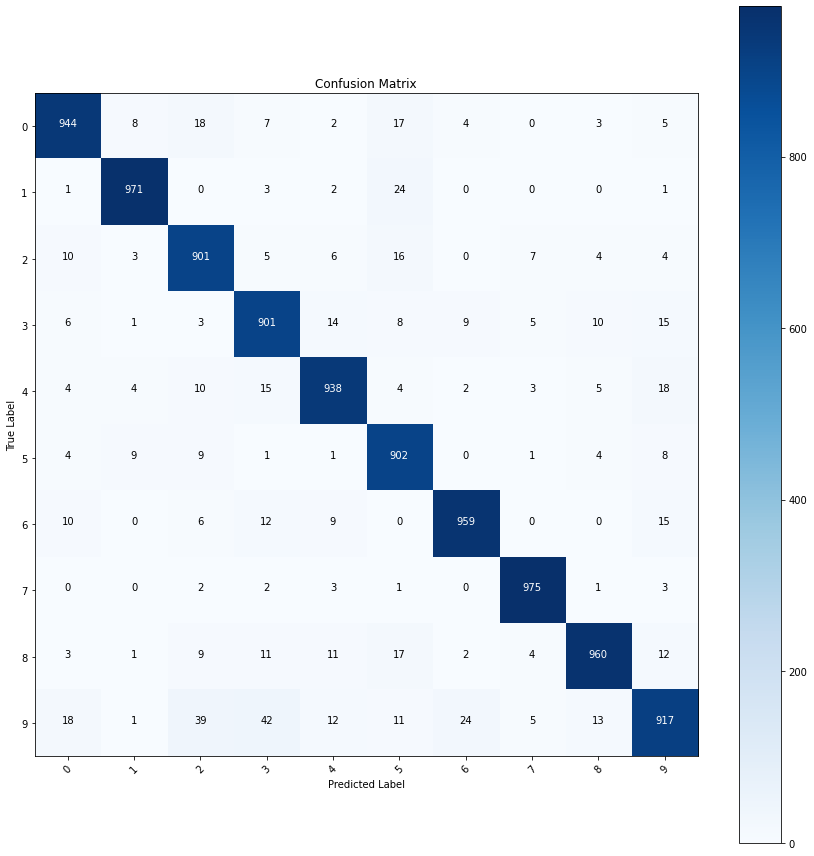

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_classes, y_true,)
import itertools
plt.clf()
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.imshow(cm, cmap = plt.cm.Blues, interpolation='nearest')

plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(range(10)))
plt.xticks(tick_marks, range(10), rotation=45)
plt.yticks(tick_marks, range(10))
thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i , cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.savefig('con_matrix_LSTM_GTZAN.png')